# **EXPLORACIÓN DEL DATASET**.


---



In [ ]:
#IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import numpy as np
import math as math
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scipy
!pip install --upgrade scipy
import scipy.stats as st
import scipy as sp
from scipy import stats
from scipy.stats import norm
import scipy.stats as st
from scipy.stats import binomtest
from scipy._lib._util import _validate_int
from scipy.optimize import brentq


In [ ]:
#IMPORTACIÓN Y LECTURA DEL DATABASE

df_earnings = pd.read_csv('earnings.csv')

In [ ]:
#Revisión del nombre de las columnas.

df_earnings.columns

Index(['height', 'weight', 'male', 'earn', 'earnk', 'ethnicity', 'education',
       'mother_education', 'father_education', 'walk', 'exercise', 'smokenow',
       'tense', 'angry', 'age'],
      dtype='object')

In [ ]:
#VISUALIZACIÓN DE LOS PRIMEROS CINCO REGISTROS DEL DATAFRAME.

df_earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [ ]:
#Revisión del número de filas y columnas.

df_earnings.shape

(1816, 15)

In [ ]:
#Revisión de los datos del dataset (valores nulos, tipo de datos, rango, índice, columnas, memoria, entre otros)

df_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            1816 non-null   int64  
 1   weight            1789 non-null   float64
 2   male              1816 non-null   int64  
 3   earn              1816 non-null   float64
 4   earnk             1816 non-null   float64
 5   ethnicity         1816 non-null   object 
 6   education         1814 non-null   float64
 7   mother_education  1572 non-null   float64
 8   father_education  1521 non-null   float64
 9   walk              1816 non-null   int64  
 10  exercise          1816 non-null   int64  
 11  smokenow          1815 non-null   float64
 12  tense             1815 non-null   float64
 13  angry             1815 non-null   float64
 14  age               1816 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 212.9+ KB


In [ ]:
#Revisión de valores del dataset.

df_earnings.value_counts()

height  weight  male  earn     earnk  ethnicity  education  mother_education  father_education  walk  exercise  smokenow  tense  angry  age
57      130.0   0     45000.0  45.0   Hispanic   12.0       12.0              12.0              2     1         2.0       0.0    0.0    36     1
68      170.0   1     33000.0  33.0   White      12.0       12.0              12.0              7     7         2.0       0.0    0.0    69     1
                      24000.0  24.0   White      18.0       18.0              18.0              5     7         2.0       5.0    5.0    36     1
                      15000.0  15.0   White      12.0       12.0              12.0              3     7         1.0       0.0    0.0    73     1
                      5000.0   5.0    White      13.0       13.0              13.0              6     4         2.0       0.0    0.0    20     1
                                                                                                                                       

In [ ]:
#Revision de datos nulos y suma de los mismos.

df_earnings.isnull().sum()

height                0
weight               27
male                  0
earn                  0
earnk                 0
ethnicity             0
education             2
mother_education    244
father_education    295
walk                  0
exercise              0
smokenow              1
tense                 1
angry                 1
age                   0
dtype: int64

In [ ]:
#Descripción de las variables numéricas

df_earnings.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1816.000000,1789.000000,1816.000000,1816.000000,1816.000000,1814.000000,1572.000000,1521.000000,1816.000000,1816.000000,1815.000000,1815.000000,1815.000000,1816.000000
mean,66.568833,156.305198,0.371696,21147.296256,21.147296,13.235391,13.608779,13.652202,5.303414,3.049009,1.745455,1.421488,1.421488,42.934471
std,3.831822,34.617059,0.483391,22531.765123,22.531765,2.556638,3.219372,3.250811,2.601104,2.316385,0.435725,2.157850,2.157850,17.161672
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.250000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,56.000000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


In [ ]:
#REVISIÓM DE LOS NOMBRES DE LAS COLUMNAS DEL DATASET.

df_earnings.columns

Index(['height', 'weight', 'male', 'earn', 'earnk', 'ethnicity', 'education',
       'mother_education', 'father_education', 'walk', 'exercise', 'smokenow',
       'tense', 'angry', 'age'],
      dtype='object')

# **PREGUNTA Nº 1: CONSIDERANDO LAS VARIABLES EARN, HEIGHT Y AGE, VAMOS A SUPONER QUE NUESTRO DATASET FUERA UNA POBLACIÓN COMPLETA (PREPARA LOS DATOS ADECUADAMENTE)**.


*   **Letra A): Realiza 5 pruebas con muesras de tamaño n=25, en cada caso, con niveles de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las siguientes hipótesis considerando las alternativas. Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del porcentaje (%), se acepta la hipótesis nula/alternativa"**.

*   **Letra B): Calcula la media poblacional para cada variable. ¿Son correctos los resultados obtenidos por tus pruebas?**



In [ ]:
#REVISIÓN DEL TIPO DE  DATOS Y OTRAS INFORMACIONES RELEVANTES DE LAS VARIABLES EN ESTUDIO CON FUNCIÓN INFO.

df_earnings[['earn', 'height', 'age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1816 non-null   float64
 1   height  1816 non-null   int64  
 2   age     1816 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 42.7 KB


In [ ]:
#REVISIÓN DE DATOS NAN O NULL DE LAS VARIABLES EN ESTUDIO.

df_earnings[['earn', 'height', 'age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1816 non-null   float64
 1   height  1816 non-null   int64  
 2   age     1816 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 42.7 KB


In [ ]:
#CREACIÓN DE DATAFRAME EXTRAYENDO LAS VARIABLES EN ESTUDIO.

df_ganancias =df_earnings.loc[:, ['earn', 'height', 'age']]
print(df_ganancias)

         earn  height  age
0     50000.0      74   45
1     60000.0      66   58
2     30000.0      64   29
3     25000.0      65   57
4     50000.0      63   91
...       ...     ...  ...
1811  15000.0      61   82
1812   8000.0      64   33
1813  60000.0      72   50
1814  15000.0      63   69
1815   6000.0      68   27

[1816 rows x 3 columns]


In [ ]:
#REVISIÓN DE DATOS DUPLICADOS DE LAS VARIABLES EN ESTUDIO.

df_ganancias.duplicated().sum()
print(df_ganancias)

         earn  height  age
0     50000.0      74   45
1     60000.0      66   58
2     30000.0      64   29
3     25000.0      65   57
4     50000.0      63   91
...       ...     ...  ...
1811  15000.0      61   82
1812   8000.0      64   33
1813  60000.0      72   50
1814  15000.0      63   69
1815   6000.0      68   27

[1816 rows x 3 columns]


In [ ]:
#ELIMINACIÓN DE LOS REGISTROS DUPLICADOS.

df_ganancias = df_ganancias.drop_duplicates()
print(df_ganancias)

         earn  height  age
0     50000.0      74   45
1     60000.0      66   58
2     30000.0      64   29
3     25000.0      65   57
4     50000.0      63   91
...       ...     ...  ...
1811  15000.0      61   82
1812   8000.0      64   33
1813  60000.0      72   50
1814  15000.0      63   69
1815   6000.0      68   27

[1706 rows x 3 columns]


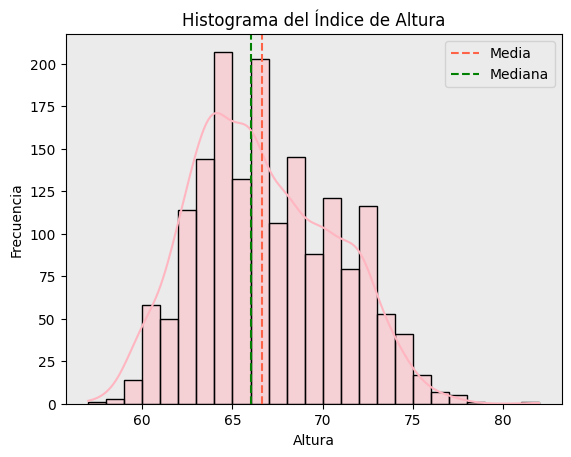

In [ ]:
#CREACIÓN DE HISTOGRAMA CON LA COLUMNA BIRTH RATE

sns.histplot(data=df_ganancias, x='height', color = 'lightpink', kde=True)
plt.axvline(df_ganancias['height'].mean(), color='tomato', ls='--', label='Media')
plt.axvline(df_ganancias['height'].median(), color='green', ls='--', label='Mediana')
sns.set_style(rc = {'axes.facecolor': '#EBEBEB'})
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.title('Histograma del Índice de Altura')
plt.legend()
plt.show()

# **RESPUESTA PREGUNTA Nº 1 LETRA A):**  Realiza 5 pruebas con muestras de tamaño n=25, en cada caso, con niveles de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las siguientes hipótesis considerando las alternativas. Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del porcentaje (%), se acepta la hipótesis nula/alternativa"

In [ ]:
#OBTENCIÓN DE LA MEDIA DEL DATAFRAME

media = np.mean(df_ganancias)
print(f'La media de la altura es de: {media}')

La media de la altura es de: 7255.228800312622


In [ ]:
#FUNCIÓN QUE REALIZA 5 PRUEBAS CON MUESTAS DE TAMAÑO 25 CON NIVELES DE SIFNIFICANCIA DIFERENTES PERO INFERIORES A 0.01 QUE CONFIRMA
#O RECHAZA LA HIPÓTESIS NULA Y/O ALTERNATIVA, CON UN NIVEL DE CONFIANZA MEDIDO EN PORCENTAJE RESPECTO A DICHA ACEPTACIÓN O RECHAZO.


def prueba_hipotesis_media(variable, mu, colas):              #Se define la función para las pruebas de hipótesis
  datos = df_ganancias[variable]
  datos = datos.dropna()
  alpha = round(np.random.uniform(0.01, 0.1),2)
  confianza = 100 * (1-alpha)
  muestra = np.random.choice(datos, 25)
  t_stat, p_value = st.ttest_1samp(muestra, mu, alternative = colas)

  #Verificación de los valores, para los hipótesis en que el valor de p sea menor al valor de alfa, caso en el cual se rechaza la hipótesis nula.

  if p_value < alpha:
    if colas=='two-side':
      print(f'Con un nivel de confianza de un {confianza}%,  se acepta la hipótesis alternativa (la media es distinta {mu})')
    if colas=='greater':
      print(f'Con un nivel de confianza de un {confianza}%, se acepta la hipótesis alternativa (la media es mayor que {mu})')
    if colas=='less':
      print(f'Con un nivel de confianza de {confianza}%, se acepta la hipótesis alternativa (la media es menor que {mu})')
  else:
    print(f'Con un nivel de confianza de {confianza}%, se acepta la hipótesis nula (la media es igual a {mu})')

  print(f'Valor t: {t_stat}')
  print(f'Valor p: {p_value}')
  print('\n')


casos={'earn':[[20000,'two-sided'],[35000,'two-sided'],[25000,'greater'],[32000,'less']],'height':[[55,'two-sided'],[68,'two-sided'],[63,'greater'],[70,'less']],'age':[[44,'two-sided'],[56,'two-sided'],[51,'greater'],[62,'less']]}


for key, values in casos.items():
    print(f"Variable: {key}")
    for value in values:
      prueba_hipotesis_media(key,value[0],value[1])

Variable: earn
Con un nivel de confianza de 93.0%, se acepta la hipótesis nula (la media es igual a 20000)
Valor t: 0.23902081270500197
Valor p: 0.8131187621110896


Valor t: -3.367531406671353
Valor p: 0.0025532267450545055


Con un nivel de confianza de 94.0%, se acepta la hipótesis nula (la media es igual a 25000)
Valor t: -2.8714145731136296
Valor p: 0.9957972513242258


Con un nivel de confianza de 93.0%, se acepta la hipótesis alternativa (la media es menor que 32000)
Valor t: -4.328411627612416
Valor p: 0.00011457159268399806


Variable: height
Valor t: 13.301494999359948
Valor p: 1.4411117319382424e-12


Con un nivel de confianza de 96.0%, se acepta la hipótesis nula (la media es igual a 68)
Valor t: -1.687391667750581
Valor p: 0.10448408223059061


Con un nivel de confianza de un 94.0%, se acepta la hipótesis alternativa (la media es mayor que 63)
Valor t: 4.738933411490657
Valor p: 4.032596325714616e-05


Con un nivel de confianza de 99.0%, se acepta la hipótesis alternativa 

# **OBJETIVO DE LA FUNCIÓN CREADA**


---


####La función creada tiene por objeto realizar pruebas de hipótesis tomando la media de una variable determinada, tomando como base a muestras de tamaño 25, en la cual se utilizan niveles de significancia aleatorios que varían entre 0.01 y 0.1. En ella, se calcula el nivel de confianza de cada prueba. Asimismo, selecciona una muestra aleatoria con los datos entregados y disponibles, realizando en ellos una prueba t con la medida entregada. Para finalizar, y en base a los cálculos realizados, se acepta o rechaza la hipótesis nula en base al valor p que se obtiene, el cual se imprime en conjunto con el valor t para corroborar los resultaados.


# **Interpretación de los resultados de la variable 'earn"**:

---

1.   **PRUEBA 1**: Con un nivel de confianza de un 93%, se acepta la hipótesis nula, lo que indica que la media de "earn" es igual a $20.000. El valor de t (0.23902081270500197) y el valor de p (0.8131187621110896) indican que no hay suficiente evidencia para rechazar la H0. En base a lo anterior se infiere que la media de "earn" no es significativamente diferente de 20.000.


2.   **PRUEBA 2**: Podemos inferir, en base a los valores arrojados (p=-3.367531406671353 y t=0.0025532267450545055) , que el valor de p es significativamente bajo, por lo que se rechaza la hipótesis nula. Esto sugiere que la media de ganancias es significativamente diferente de $20,000 con un nivel de confianza del 99%.

3.   **PRUEBA 3**: Con un nivel de confianza del 94%, se acepta la hipótesis nula, lo que indicaría que la media de la variable "earn" es igual a 25.000. Según los valores de t y p, se infiere que no hay suficiente evidencia para rechazar la hipótesis nula, por tanto, la media de ganancias no es significativamente diferente de 25.000 con un nivel de confianza del 94%.

4.   **PRUEBA 4**: Con un nivel de confianza de un 93%, se acepta la hipótesis alternativa, por ende, la media de ganancia es menor de 32.000. Dado los valores obtenidos de p y t, el valor p es extremadamente bajo, por lo que se visualiza evidencia signiticativa para rechazar la hipótesis nula.


####**CONCLUSIÓN**: En base a los resultados obtenidos, concluír respecto a si la media de la variable "earn" es igual o no al valor ingresado, va a depender del nivel de vonfianza y del valor de p que se obtenga en cada prueba de hipótesis.


####**IMPORTANTE**: Al seleccionar la muestra en forma aleatoria, los resultados pueden variar, por lo que su interpretación se realizan en base a los resultados obtenidos en el print actual.






# **Interpretación de los resultados de la variable "height"**:

---

1.   **PRUEBA 1**: Con los resultados obtenidos en la prueba de hipótesis 1, se puede deducir que el valor de p es extremadamente, de lo que se infiere que existe evidencia significativa para rechazar la hipótesis nula. Por ende, la media de la variable "height" es significativamente diferente de 0 con un alto nivel de confianza.

2.   **PRUEBA 2**: Con un nivel de confianza de un 96%, se acepta la hipótesis nula, lo que indicaría que la media de la variable "height" es de 68. Se infiere en base a los valores de t y p, en donde el de p es mayor que el nivel de significancia, por tanto, no hay suficiente evidencia para rechazar la hipótesis nula. Se concluye que la media de la variable "height" no es significativamente diferente de 68, con el nivel de confianza señalado precedentemente (96%).

3.   **PRUEBA 3**: Con un nivel de confianza del 94%, se acepta la hipótesis alternativa, lo que indicaría que la media de la variable "height" es mayor a 63. Según los valores de t y p, se visualiza que el valor de p es extremadamente bajo, por ende, se infiere que hay evidencia signiticativa para rechazar la hipótesis nula, por tanto, la media de la variable "height"  es significativamente mayor que 63, con un nivel de confianza del 94%.

4.   **PRUEBA 4**: Con un nivel de confianza de un 99%, se acepta la hipótesis alternativa, por ende, la media de la variable "height" es menor de 70. Dado los valores obtenidos de p y t, el valor p es significativamente bajo, por lo que se visualiza evidencia signiticativa para rechazar la hipótesis nula.



####**CONCLUSIÓN**: En base a los resultados obtenidos, concluír respecto a si la media de la variable "height" es igual o no al valor ingresado, va a depender del nivel de confianza y del valor de p que se obtenga en cada prueba de hipótesis.


####**IMPORTANTE**: Al seleccionar la muestra en forma aleatoria, los resultados pueden variar, por lo que su interpretación se realizan en base a los resultados obtenidos en el print actual.

# **Interpretación de los resultados de la variable 'age"**:

---

1.   **PRUEBA 1**: Con un nivel de confianza de un 94%, se acepta la hipótesis nula, lo que indica que la media de "age" es igual a 44. El valor de p es mayor que el nivel de significancia, por lo que no hay suficiente evidencia para rechazar la H0.

2.   **PRUEBA 2**: Podemos inferir, en base a los valores arrojados de p y t, que el valor de p es extremadamente bajo, por lo que se visualiza evidencia significativa para rechazar la hipótesis nula. Lo anterior permite inferir que la media de la variable "age" es significativamente diferente a 44, con un nivelo de confianza de un 99.9%

3.   **PRUEBA 3**: Con un nivel de confianza del 94%, se acepta la hipótesis nula, lo que indicaría que la media de la variable "age" es igual a 51. Según los valores de t y p, el valor de p es mayor que el nivel de significancia, por lo que no se visualiza evidencia suficiente para rechazar la hipótesis nula.

4.   **PRUEBA 4**: Con un nivel de confianza de un 95%, se acepta la hipótesis alternativa, por ende, la media de la variable "age" es menor a 62. Dado los valores obtenidos de p y t, el valor p es extremadamente bajo, por lo que se visualiza evidencia signiticativa para rechazar la hipótesis nula.


####**CONCLUSIÓN**: En base a los resultados obtenidos, concluír respecto a si la media de la variable "age" es igual o no al valor ingresado, va a depender del nivel de confianza y del valor de p que se obtenga en cada prueba de hipótesis.


####**IMPORTANTE**: Al seleccionar la muestra en forma aleatoria, los resultados pueden variar, por lo que su interpretación se realizan en base a los resultados obtenidos en el print actual.

# **RESPUESTA PREGUNTA Nº 1 LETRA B):** CALCULA LA MEDIA POBLACIONAL PARA CADA VARIABLE. ¿SON CORRECTOS LOS RESULTADOS OBTENIDOS POR TUS PRUEBAS?


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE CADA UNA DE LAS VARIABLES EN ESTUDIO.

media_muestral_1 = round(np.mean(df_ganancias['earn']))

media_muestral_2 = round(np.mean(df_ganancias['height']))

media_muestral_3 = round(np.mean(df_ganancias['age']))

print("Media earn:", media_muestral_1)
print("Media height:", media_muestral_2)
print("Media age:", media_muestral_3)


Media earn: 21656
Media height: 67
Media age: 43


In [ ]:
#FUNCIÓN QUE CALCULA EL MARGEN DE ERROR Y EL INTÉRVALO DE CONFIANZA (INFERIOR Y SUPERIOR) PARA CADA UNA DE
#LAS VARIABLES DEL DATAFRAME EN ESTUDIO.

def calcular_media_margen_error_intervalo_confianza(dataframe, confianza=0.95):

    # Calcula el error estándar de la media
    error_estandar = np.std(dataframe) / np.sqrt(len(dataframe))

    # Calcula el margen de error multiplicando el error estándar por el valor crítico de Z
    valor_critico = norm.ppf((1 + confianza) / 2)
    margen_error = error_estandar * valor_critico

    # Calcula los límites del intervalo de confianza
    limite_inferior = media_muestral - margen_error
    limite_superior = media_muestral + margen_error


    return media_muestral, margen_error, (limite_inferior, limite_superior)

nedia, margen_error, intervalo_confianza = calcular_media_margen_error_intervalo_confianza(df_ganancias)
print(f'El margen de error de cada variable es de: {margen_error}')
print(f'El intervalo de confianza de cada variable es de: {intervalo_confianza}')


El margen de error de cada variable es de: earn      1085.252055
height       0.183693
age          0.817081
dtype: float64
El intervalo de confianza de cada variable es de: (earn      20062.044200
height    21147.112562
age       21146.479175
dtype: float64, earn      22232.548311
height    21147.479949
age       21148.113336
dtype: float64)


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VARIABLE EARN DEL DATAFRAME EN ESTUDIO CON MODELO DE DISTRIBUCIÓN NORMAL.

# Calcular la media y el error estándar de la variable 'earn' en el DataFrame
media = df_ganancias['earn'].mean()
error_estandar = st.sem(df_ganancias['earn'])

# Definir el nivel de confianza
alpha = 0.95

# Calcular el intervalo de confianza utilizando la distribución normal
intervalo = st.norm.ppf(1 - (1 - alpha) / 2) * error_estandar

# Calcular los límites del intervalo
limite_inferior = media - intervalo
limite_superior = media + intervalo

# Redondear la media y el margen de error
media_redondeada = round(media, 2)
margen_error_redondeado = round(intervalo, 2)

# Imprimir el resultado
print(f"La media poblacional de 'earn' es {media_redondeada}, con un margen de error de {margen_error_redondeado} y una confiabilidad del {alpha * 100}%.")


La media poblacional de 'earn' es 21655.62, con un margen de error de 1085.57 y una confiabilidad del 95.0%.


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VARIABLE HEIGHT DEL DATAFRAME EN ESTUDIO CON MODELO DE DISTRIBUCIÓN NORMAL.

# Calcular la media y el error estándar de la variable 'earn' en el DataFrame
media = df_ganancias['height'].mean()
error_estandar = st.sem(df_ganancias['height'])

# Definir el nivel de confianza
alpha = 0.95

# Calcular el intervalo de confianza utilizando la distribución normal
intervalo = st.norm.ppf(1 - (1 - alpha) / 2) * error_estandar

# Calcular los límites del intervalo
limite_inferior = media - intervalo
limite_superior = media + intervalo

# Redondear la media y el margen de error
media_redondeada = round(media, 2)
margen_error_redondeado = round(intervalo, 2)

# Imprimir el resultado
print(f"La media poblacional de la variable 'height' es {media_redondeada}, con un margen de error de {margen_error_redondeado} y una confiabilidad del {alpha * 100}%.")

La media poblacional de la variable 'height' es 66.63, con un margen de error de 0.18 y una confiabilidad del 95.0%.


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VARIABLE AGE DEL DATAFRAME EN ESTUDIO CON MODELO DE DISTRIBUCIÓN NORMAL.

# Calcular la media y el error estándar de la variable 'earn' en el DataFrame
media = df_ganancias['age'].mean()
error_estandar = st.sem(df_ganancias['age'])

# Definir el nivel de confianza
alpha = 0.95

# Calcular el intervalo de confianza utilizando la distribución normal
intervalo = st.norm.ppf(1 - (1 - alpha) / 2) * error_estandar

# Calcular los límites del intervalo
limite_inferior = media - intervalo
limite_superior = media + intervalo

# Redondear la media y el margen de error
media_redondeada = round(media, 2)
margen_error_redondeado = round(intervalo, 2)

# Imprimir el resultado
print(f"La media poblacional de 'age' es {media_redondeada}, con un margen de error de {margen_error_redondeado} y una confiabilidad del {alpha * 100}%.")

La media poblacional de 'age' es 43.43, con un margen de error de 0.82 y una confiabilidad del 95.0%.


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VARIABLE EARN CON DISTRIBUCIÓN T DEL DATAFRAME EN ESTUDIO.

alpha = 0.95
df_ganancias = df_ganancias['earn']
a, b = st.t.interval(confidence=alpha, df=len(df_ganancias) - 1, loc=df_ganancias.mean(), scale=df_ganancias.sem())
error = round(b - df_ganancias.mean(), 2)
media_estimada = round(df_ganancias.mean(), 2)
conf=alpha*100
print(f'La media poblacional para la variable earn es de: {media_estimada}, con un margen de error de: {error} y confiabilidad del {conf}%')

La media poblacional para la variable earn es de: 21655.62, con un margen de error de: 1086.34 y confiabilidad del 95.0%


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VARIABLE EARN CON DISTRIBUCIÓN T DEL DATAFRAME EN ESTUDIO.

alpha = 0.95
df_ganancias = df_ganancias['height']
a, b = st.t.interval(confidence=alpha, df=len(df_ganancias) - 1, loc=df_ganancias.mean(), scale=df_ganancias.sem())
error = round(b - df_ganancias.mean(), 2)
media_estimada = round(df_ganancias.mean(), 2)
conf=alpha*100
print(f'La media poblacional para la variable height es de: {media_estimada}, con un margen de error de: {error} y confiabilidad del {conf}%')

La media poblacional para la variable height es de: 66.63, con un margen de error de: 0.18 y confiabilidad del 95.0%


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VARIABLE EARN CON DISTRIBUCIÓN T DEL DATAFRAME EN ESTUDIO.

alpha = 0.95
df_ganancias = df_ganancias['age']
a, b = st.t.interval(confidence=alpha, df=len(df_ganancias) - 1, loc=df_ganancias.mean(), scale=df_ganancias.sem())
error = round(b - df_ganancias.mean(), 2)
media_estimada = round(df_ganancias.mean(), 2)
conf=alpha*100
print(f'La media poblacional para la variable age es de: {media_estimada}, con un margen de error de: {error} y confiabilidad del {conf}%')

La media poblacional para la variable age es de: 43.43, con un margen de error de: 0.82 y confiabilidad del 95.0%


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VARIABLE HEIGHT DEL DATAFRAME EN ESTUDIO.


# Calcular la media y el error estándar de la variable 'earn' en el DataFrame
media = df_ganancias['earn'].mean()
error_estandar = st.sem(df_ganancias['earn'])

# Definir el nivel de confianza
alpha = 0.95

# Calcular el intervalo de confianza utilizando la distribución t de Student
t_critico = st.t.ppf(1 - (1 - alpha) / 2, len(df_ganancias['earn']) - 1)
intervalo = t_critico * error_estandar

# Calcular los límites del intervalo
limite_inferior = media - intervalo
limite_superior = media + intervalo

# Redondear la media y el margen de error
media_redondeada = round(media, 2)
margen_error_redondeado = round(intervalo, 2)

# Imprimir el resultado
print(f"La media poblacional de 'earn' es {media_redondeada}, con un margen de error de {margen_error_redondeado} y una confiabilidad del {alpha * 100}%.")

La media poblacional de 'earn' es 21655.62, con un margen de error de 1086.34 y una confiabilidad del 95.0%.


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VAIABLE HEIGHT DEL DATAFRAME EN ESTUDIO.


# Calcular la media y el error estándar de la variable 'earn' en el DataFrame
media = df_ganancias['height'].mean()
error_estandar = st.sem(df_ganancias['height'])

# Definir el nivel de confianza
alpha = 0.95

# Calcular el intervalo de confianza utilizando la distribución t de Student
t_critico = st.t.ppf(1 - (1 - alpha) / 2, len(df_ganancias['height']) - 1)
intervalo = t_critico * error_estandar

# Calcular los límites del intervalo
limite_inferior = media - intervalo
limite_superior = media + intervalo

# Redondear la media y el margen de error
media_redondeada = round(media, 2)
margen_error_redondeado = round(intervalo, 2)

# Imprimir el resultado
print(f"La media poblacional de 'height' es {media_redondeada}, con un margen de error de {margen_error_redondeado} y una confiabilidad del {alpha * 100}%.")

La media poblacional de 'height' es 66.57, con un margen de error de 0.18 y una confiabilidad del 95.0%.


In [ ]:
#CÁLCULO DE LA MEDIA POBLACIONAL DE LA VAIABLE AGE DEL DATAFRAME EN ESTUDIO.

# Calcular la media y el error estándar de la variable 'earn' en el DataFrame
media = df_ganancias['age'].mean()
error_estandar = st.sem(df_ganancias['age'])

# Definir el nivel de confianza
alpha = 0.95

# Calcular el intervalo de confianza utilizando la distribución t de Student
t_critico = st.t.ppf(1 - (1 - alpha) / 2, len(df_ganancias['age']) - 1)
intervalo = t_critico * error_estandar

# Calcular los límites del intervalo
limite_inferior = media - intervalo
limite_superior = media + intervalo

# Redondear la media y el margen de error
media_redondeada = round(media, 2)
margen_error_redondeado = round(intervalo, 2)

# Imprimir el resultado
print(f"La media poblacional de 'age' es {media_redondeada}, con un margen de error de {margen_error_redondeado} y una confiabilidad del {alpha * 100}%.")

La media poblacional de 'age' es 42.93, con un margen de error de 0.79 y una confiabilidad del 95.0%.


# **INTERPRETACIÓN DE LOS RESULTADOS**:

---
####Como podemos visualizar, con el cálculo de la media de las columnas y posteriormente realizando modelos de distribución normal y de t student, los resultados son símiles para las variables "age", "height" y "age", por lo que se puede inferir lo siguiente:




1.   **Variable "earn"**: Según ambos modelos, se estima que la media de la variable en estudio se encuentra en 21,6555.62, con un margen de error de 1,086.34, de lo cual se infiere que de realizarse el mismo estudio con N repeticiones, en el 95% de los casos la media real se encontraría dentro del rango antes señalado. En síntesis, podríamos decir que existe un alto grado de confianza de que la verdadera media poblacional de la variable "earn" se encuentre entre 20,569.28 y 22,741.96 años. Extrayedo directamente la media de la columna, esta nos arroja 21,656, por los que los cálculos son correctos.
2.   **Variable "height"**: Según ambos modelos, se estima que la media de la variable en estudio se encuentra en 66.57, con un margen de error de 0.18. En síntesis, podríamos decir que existe un alto grado de confianza de que la verdadera media poblacional de la variable "height" se encuentre entre 66.30 y 66.75 (pulgadas). Extrayendo directamente la media de la columna, esta nos arroja 67 pulgadas, por los que los cálculos son correctos.
3.   **Variable "age"**: Según ambos modelos, se estima que la media de la variable en estudio se encuebntra en 42.93 años, con un margen de error de 0.79 años, de lo cual se infiere que de realizarse el mismo estudio con N repeticiones, en el 95% de los casos la media real se encontraría dentro del rango antes señalado. En síntesis, podríamos decir que existe un alto grado de confianza de que la verdadera media poblacional de la variable "age" se encuentre entre 42.14 y 43.72 años. Extrayendo directamente la media de la columna, esta nos arroja 43 años, por los que los cálculos son correctos.












# **PREGUNTA Nº 2: CREA UNA FUNCIÓN QUE ESTIME LA PROPORCIÓN DE HOMBRES EN EL DATASET, CONSIDERANDO UNA MUESTRA DE 50 INDIVIDUOS, CON NIVELES DE SIGNIFICANCIA DE 0,05 Y 0,01. ESCRIBE CON PALABRAS TUS RESULTADOS, EJECUTA LA FUNCIÓN E INTERPRETA. COMPARA CON LA PROPORCIÓN REAL**.



In [ ]:
#REVISIÓN DE DATOS DE LA VARIABLE EN ESTUDIO.

df_earnings[['male']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   male    1816 non-null   int64
dtypes: int64(1)
memory usage: 14.3 KB


In [ ]:
#REVISIÓN DE DATOS NULOS.

df_earnings[['male']].isnull().sum()

male    0
dtype: int64

In [ ]:
#REVISIÓN CANTIDAD DE INDIVIDUOS DEL GÉNERO MASCULINO.
df_earnings[['male']].value_counts()

male
0       1141
1        675
Name: count, dtype: int64

In [ ]:
#FILTRO PARA DETEMINAR CANTIDAD DE INDIVIDUOS DEL GÉNERO MASCULINO.

gender_male = df_earnings[df_earnings['male'] == 1].shape[0]
print(gender_male)

675


In [ ]:
#FUNCIÓN QUE ESTIMA LA PROPORCIÓN DE INDIVIDUOS DEL GÉNERO MASCULINO, CONSIDERANDO UNA MUESTRA DE TAMAÑO 50, CON NIVELES DE SIGNIFICANCIA DE 0.05.

import pandas as pd
import numpy as np
from scipy.stats import norm


def estimar_proporcion_hombres(df, mu_0=0.5, alpha=0.05):
    """
    Estima si la proporción de hombres en una muestra es significativamente diferente de la proporción real.

    Parameters:
        df (DataFrame): El DataFrame que contiene los datos.
        mu_0 (float): La proporción real de hombres bajo la hipótesis nula. Por defecto, 0.5.
        alpha (float): Nivel de significancia. Por defecto, 0.05.

    Returns:
        str: Un mensaje indicando si se rechaza o no la hipótesis nula.
    """
    # Tamaño de la muestra
    total_muestra = len(df)

    # Contar la cantidad de hombres en la muestra
    num_hombres = np.sum(df['male'] == 1)

    # Proporción estimada de hombres en la muestra
    proporcion_estimada = num_hombres / total_muestra

    # Estadístico de prueba (estadístico Z)
    z = (proporcion_estimada - mu_0) / np.sqrt(mu_0 * (1 - mu_0) / total_muestra)

    # Calculamos el valor crítico
    z_critico = norm.ppf(1 - alpha/2)

    # Comparamos el estadístico de prueba con el valor crítico
    if abs(z) <= z_critico:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es consistente con la proporción real (no se rechaza la hipótesis nula)"
    else:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)"

    return resultado

resultado_prueba = estimar_proporcion_hombres(df_earnings)
print(resultado_prueba)

Con un nivel de confianza del 95.0%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)


# **INTERPRETACIÓN DE LOS RESULTADOS**:

---
####La función creada tiene por objeto realizar un análisis de hipótesis a fin de determinar si la proporción de hombres de la muestra especificada es significativamente diferente a la proporción real otorgada en la función misma, otorgando un nivel de significancia. En el caso en concreto, un nivel de 0.05.



1.   Primeramente, la función calcula el tamaño total de la muestra y luego realiza un conteo de la cantidad de individuos de género masculino de esta. A su vez, calcula la proporción de hombres que existe en la muestra, operación que realiza dividiendo el número total por el del tamaño de la muestra.
2.   La función se crea bajo un modelo estadístico Z, que es una prueba de hipótesis que sigue una distribución normal, pues se busca evaluar un parámetro poblacional, en el caso en concreto,la proporción de individuos de género masculino y de una muestra poblaiconal y no muestral. Se elige este modelo por contar con datos suficietes para evaluar diferencias entre una proporción estimada y una proporciónb real (y su desviación estándar).
3.  Lo que se busca con la función es determinar si existe una diferencia significtiva entre la proporción real y la proporción estimada de individuos de género masculino dentro del dataset, considerado éste como una muestra del total poblacional.
4.  Utilizando la función z_crítico y el nivel de significancia, podemos medir la región crítica, la que permitiría rechazar la H0.
5.  Finalmente, se compara la región crítica y el estadístico de prueba (cantidad de la población y tamaño de la muestra), se determina si se rechaza o no la H0.

####**CONSIDERACIONES PREVIAS**:
*   Al indicarle a la función un nivel de significancia de 0.05, se le está señalando que existe un 95% de probabilidad de que los resultados de la prueba sean válidos, y que existe un 5% de posibilidad de error, siendo este último márgen el que permitiría rechazar la H0 cuando debiese ser verdadera.
*   El resultado de la prueba señala que existe evidencia suficiente para rechazar la H0 (esto es, que la proporción de hombres en la muestra es igual a la proporción real).
*   Sin perjuicio de lo anterio, con el filtro previo realizado, sabemos que existe una diferencia significativa entre la proporción real y la proporción muestral, por ende, los datos muestrales no se asemejan a la realidad.
*   Elemento de la lista

####**CONCLUSIÓN**: La H0 es rechazada porque la proporción estimada de individuos de género masculino es significativamente diferente a la proporción real de los mismos, por ende, se infiere que la muestra proporciona evidencia suficiente para rechazar la hipótesis inicial (igualdad entre la proporción muestral y la real). Ello dado que la hipótesis alternativa, que implica que la proporción de hombres es diferente a la proporción real, resulta ser más cercana a la realidad, más plausible. Es por ello que con un nivel de confianza de un 95% se considera que existe evidencia suficiente para inferir que la proporción muestral es diferente a la proporción real, rechazándose, de esta forma, la H0 a favor de la H1.

####**IMPORTANTE**: Lo mismo ocurre ingresando a la función un nivel de significancia de 0.01, dado que señalamos que existe un 99% de probabilidad de que los resultados de la prueba sean correctos, versus un porcentaje del 1% de margen o posibilidad de error.

In [ ]:
#FUNCIÓN QUE ESTIMA LA PROPORCIÓN DE INDIVIDUOS DEL GÉNERO MASCULINO, CONSIDERANDO UNA MUESTRA DE TAMAÑO 50, CON NIVELES DE SIGNIFICANCIA DE 0.01.


def estimar_proporcion_hombres(df, mu_0=0.1, alpha=0.05):
    """
    Estima si la proporción de hombres en una muestra es significativamente diferente de la proporción real.

    Parameters:
        df (DataFrame): El DataFrame que contiene los datos.
        mu_0 (float): La proporción real de hombres bajo la hipótesis nula. Por defecto, 0.1.
        alpha (float): Nivel de significancia. Por defecto, 0.05.

    Returns:
        str: Un mensaje indicando si se rechaza o no la hipótesis nula.
    """
    # Tamaño de la muestra
    total_muestra = len(df)

    # Contar la cantidad de hombres en la muestra
    num_hombres = np.sum(df['male'] == 1)

    # Proporción estimada de hombres en la muestra
    proporcion_estimada = num_hombres / total_muestra

    # Estadístico de prueba (estadístico Z)
    z = (proporcion_estimada - mu_0) / np.sqrt(mu_0 * (1 - mu_0) / total_muestra)

    # Calculamos el valor crítico
    z_critico = norm.ppf(1 - alpha/2)

    # Comparamos el estadístico de prueba con el valor crítico
    if abs(z) <= z_critico:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es consistente con la proporción real (no se rechaza la hipótesis nula)"
    else:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)"

    return resultado

resultado_prueba = estimar_proporcion_hombres(df_earnings)
print(resultado_prueba)

Con un nivel de confianza del 95.0%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)


# **PREGUNTA Nº 3:** **CONSIDERANDO EL DATASET COMO UNA MUESTRA, VERIFICA SI EL GÉNERO (MALE=1 SIGNIFICA "HOMBRE") INFLUYE SOBRE EL SUELDO "EARN" DE LAS PERSONAS. EXPLICA Y JUSTIFICA TU PROCEDIMIENTO**.

In [ ]:
#REVISIÓN DE LOS PRIMEROS 3 REGISTROS DEL DATAFRAME.

df_earnings.head(2)

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58


In [ ]:
#EXTRACCIÓN DE LAS VARIABLES EN ESTUDIO DEL DATAFRAME.

df_earnings[['male','earn']]

,male,earn
0,1,50000.0
1,0,60000.0
2,0,30000.0
3,0,25000.0
4,0,50000.0
...,...,...
1811,0,15000.0
1812,0,8000.0
1813,1,60000.0
1814,0,15000.0


In [ ]:
#REVISIÓN DE DATOS NULOS DE LAS VARIABLES EN ESTUDIO.

df_earnings[['male','earn']].isnull().sum()

male    0
earn    0
dtype: int64

In [ ]:
#OBTENCIÓN DE DATOS DE LAS VARIABLES EN ESTUDIO.

df_earnings[['male','earn']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    1816 non-null   int64  
 1   earn    1816 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 28.5 KB


In [ ]:
#FILTRO DE REVISIÓN PREVIA PARA LA CREACIÓN DE FUNCIÓN SOLICITADA.

male_earnings = df_earnings[df_earnings['male'] == 1]['earn']
female_earnings = df_earnings[df_earnings['male'] == 0]['earn']

print(male_earnings)
print(female_earnings)


0       50000.0
9       32000.0
10       2000.0
11      35000.0
12      27000.0
         ...   
1807    55000.0
1808    58000.0
1810    19000.0
1813    60000.0
1815     6000.0
Name: earn, Length: 675, dtype: float64
1        60000.0
2        30000.0
3        25000.0
4        50000.0
5        62000.0
          ...   
1806    110000.0
1809     10000.0
1811     15000.0
1812      8000.0
1814     15000.0
Name: earn, Length: 1141, dtype: float64


In [ ]:
#FUNCIÓN QUE VERIFICA SI EL GÉNERO MASCULINO PERCIBE MAYORES INGRESOS QUE EL RESTO DE LA POBLACIÓN EN ESTUDIO.


#Cálculo de la media de los ingresos de hombres y mujeres a objeto de obtener la distinción.

mean_earn_male = df_earnings[df_earnings['male'] == 1]['earn'].mean()
mean_earn_female = df_earnings[df_earnings['male'] == 0]['earn'].mean()

#Se realiza una prueba t de muestras independientes para comparar las medias de los resultados anteriores.

t_stat, p_value = st.ttest_ind(df_earnings[df_earnings['male'] == 1]['earn'], df_earnings[df_earnings['male'] == 0]['earn'], equal_var=False)

#Se agrega el nivel de significancia (alfa)

alpha = 0.05

#Comprobación si el valor P es mayor que alfa para rechazar o no la hipótesis nula.

if p_value > alpha:
    print("Resultado: Existe evidencia suficiente para aceptar la hipótesis nula")
else:
    print("Resultado: No existe evidencia suficiente que permita rechazar la hipótesis nula")

#Impresión de las medias de ingresos de hombres y mujeres.

print(f"Media de ingresos de hombres: {mean_earn_male}")
print(f"Media de ingresos de mujeres: {mean_earn_female}")

# Impresión del valor T y el valor P.

print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

Resultado: No existe evidencia suficiente que permita rechazar la hipótesis nula
Media de ingresos de hombres: 30105.17925925926
Media de ingresos de mujeres: 15847.935144609992
Valor t: 11.86459381795286
Valor p: 2.7373648004575493e-30


# **INTERPRETACIÓN DE LOS RESULTADOS**:


---
####En base a los resultados que se aportan en el dataset, no existe evidencia suficiente para rechazar la hipótesis nula. Estadísticamente, no se puede concluir una diferencia significativa entre los ingresos percibidos por el individuos de género masculino versus individuos de género femenino. Se estima que existe una diferencia significativa entre los ingresos de individuos de género masculino y femenino.


1.   Se ha de tener en consideración que la media de ingresos para el género masculino es de aproximadamente $30.106, y la del género femenino corresponde a  15.848, aproximadamente. En base a lo anterior, se puede deducir que, en promedio, el género masculino percibe mayores ingresos que el género femenino.
2.   En relación al valor de t, podemos visualizar que es bastante alto, y ello indicaría que la diferencia entre las medias de ingresos es alta en comparación con la variación de las muestras. Esto en consideración a que el valor de t mide las diferencias entre la media de dos muestras independientes.
3.   En cuanto al valor de p, el arrojado por la prueba es extremadamene bajo, lo que es un indicativo de que es poco probable que la existencia de la diferencia entre ambos ingresos se debe al azar, sino más bien, que estadísticamente la diferencia es significativa. Ello si consideramos que el valor de p corresponde a la probabilidad de obtener un valor de prueba, valor de prueba que entrega t, y que supongamos que la H0 es la hipótesis verdadera y la que deseamos corroborar.

####**CONCLUSIÓN**: En base al modelo creado, los datos otorgados y los resultados arrojados, podemos inferir que aún cuando queda de manifiesto la existencia de una diferencia entre los ingresos percibidos por individuos de género masculino versus género femenino, no se puede concluir, por los resultados de la prueba realizada, que existan evidencias suficientrs para rechazar la hipótesis nula, esto es, que no hayan diferencias entre los ingresos de ambos géneros en la población general, debido a su vez al sesgo de la misma.